LOADING AND READING DATASET

In [1]:
# Import Pandas as pd
import pandas as pd

# Load dataset
file_path = r'C:\Users\SusannaBeatson\Desktop\My Projects\Python - Superstore dataset\Global_Superstore.xlsx'
orders = pd.read_excel(file_path, sheet_name='Orders')
returns = pd.read_excel(file_path, sheet_name= 'Returns')
people = pd.read_excel(file_path, sheet_name= 'People')

orders.head()
#returns.head()
#people.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,ID-0,2016-01-01,2016-01-02,First Class,CUST-0,Home Office,United States,Chicago,New York,10001,East,PROD-0,Technology,Chairs,Product B,191.69,6,0.22,4.70
1,ID-1,2016-01-02,2016-01-03,Same Day,CUST-1,Consumer,United States,Houston,California,10001,West,PROD-1,Office Supplies,Chairs,Product A,460.17,7,0.05,-38.11
2,ID-2,2016-01-03,2016-01-04,Second Class,CUST-2,Consumer,United States,Los Angeles,New York,77001,West,PROD-2,Technology,Chairs,Product B,208.22,8,0.14,195.24
3,ID-3,2016-01-04,2016-01-05,First Class,CUST-3,Home Office,United States,New York,New York,60601,East,PROD-3,Technology,Chairs,Product B,373.29,1,0.04,109.61
4,ID-4,2016-01-05,2016-01-06,Same Day,CUST-4,Consumer,United States,Houston,New York,60601,South,PROD-4,Technology,Phones,Product D,86.84,8,0.11,-49.52


TOP 10 PRODUCTS BY SALES AND PROFIT

In [2]:
# Group data by product and summarize
top_products = orders.groupby('Product Name')[['Sales', 'Profit']].sum().reset_index()

# Sort and get top 10 by sales
top_sales = top_products.sort_values(by='Sales', ascending=False).head(10)
top_sales


,Product Name,Sales,Profit
0,Product A,65653.37,19325.34
1,Product B,63756.82,17144.72
3,Product D,63366.51,20119.58
2,Product C,62820.53,17607.38


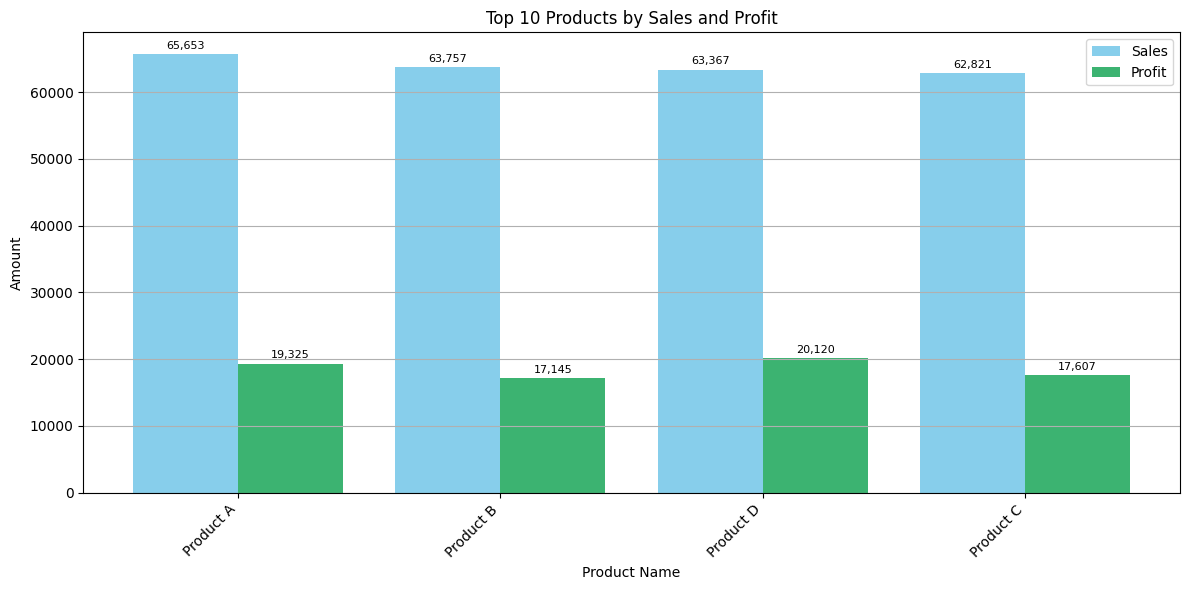

In [3]:
# Plot sales and profit for top 10 performing products
import matplotlib.pyplot as plt
import numpy as np

# Set figure size
plt.figure(figsize=(12, 6))

# Positions
x = np.arange(len(top_sales['Product Name']))
width = 0.4

# Bars
bars1 = plt.bar(x - width/2, top_sales['Sales'], width, label='Sales', color='skyblue')
bars2 = plt.bar(x + width/2, top_sales['Profit'], width, label='Profit', color='mediumseagreen')

# Annotations
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
             f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
             f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

# Labels
plt.title('Top 10 Products by Sales and Profit')
plt.xlabel('Product Name')
plt.ylabel('Amount')
plt.xticks(x, top_sales['Product Name'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')

plt.show()
